# 데이터 분석 기초

게임 League of Legend의 데이터셋을 기반으로 데이터 분석

## 1. 파일을 Pandas DataFrame으로 받고, Blue팀의 승률을 출력해 보세요.

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("high_diamond_ranked_10min.csv")

# 속성 종류 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [2]:
df.groupby('blueWins').count()

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueWins,,,,,,,,,,,,,,,,,,,,,
0,4949,4949,4949,4949,4949,4949,4949,4949,4949,4949,...,4949,4949,4949,4949,4949,4949,4949,4949,4949,4949
1,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,...,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930


In [3]:
# 결측치 체크

nan_check_list = df.columns

for x in range(len(df.columns)):
    print(f'{df[nan_check_list[x]].isnull().value_counts()}')
    
# df["blueWins"].isnull().value_counts()

False    9879
Name: gameId, dtype: int64
False    9879
Name: blueWins, dtype: int64
False    9879
Name: blueWardsPlaced, dtype: int64
False    9879
Name: blueWardsDestroyed, dtype: int64
False    9879
Name: blueFirstBlood, dtype: int64
False    9879
Name: blueKills, dtype: int64
False    9879
Name: blueDeaths, dtype: int64
False    9879
Name: blueAssists, dtype: int64
False    9879
Name: blueEliteMonsters, dtype: int64
False    9879
Name: blueDragons, dtype: int64
False    9879
Name: blueHeralds, dtype: int64
False    9879
Name: blueTowersDestroyed, dtype: int64
False    9879
Name: blueTotalGold, dtype: int64
False    9879
Name: blueAvgLevel, dtype: int64
False    9879
Name: blueTotalExperience, dtype: int64
False    9879
Name: blueTotalMinionsKilled, dtype: int64
False    9879
Name: blueTotalJungleMinionsKilled, dtype: int64
False    9879
Name: blueGoldDiff, dtype: int64
False    9879
Name: blueExperienceDiff, dtype: int64
False    9879
Name: blueCSPerMin, dtype: int64
False    9879
N

In [4]:
# 전체 게임 수 구하기

len(df.blueWins)

9879

In [5]:
# Blue 팀 승리/패배 수 구하기

blue_win_count = df[df['blueWins'] == 1]
print(f'Blue Team Win count : {len(blue_win_count)}')
blue_lose_count = df[df['blueWins'] == 0]
print(f'Blue Team lose count : {len(blue_lose_count)}')
print(f'Whole game : {len(blue_win_count) + len(blue_lose_count)}')

Blue Team Win count : 4930
Blue Team lose count : 4949
Whole game : 9879


In [6]:
blue_win_count

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5
12,4515594785,1,18,1,1,7,1,11,1,1,...,0,14591,6.8,17443,240,50,-3274,-1659,24.0,1459.1
14,4516505202,1,15,3,1,4,4,4,0,0,...,0,16192,7.0,18083,242,48,470,187,24.2,1619.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,4527650398,1,12,0,1,7,7,9,0,0,...,0,16399,7.0,18001,216,58,-756,-1,21.6,1639.9
9873,4527878058,1,18,2,1,12,6,13,0,0,...,0,15934,6.6,17027,197,38,-2639,-2364,19.7,1593.4
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6


전체 게임 수가 9879개이고 결측치 체크를 통해 누락된 결측치는 없다고 판단함

In [6]:
# Blue 팀 승리 수 / (Blue 팀 승리 수 + Blue 팀 패배 수) =====> Blue 팀 승률

len(blue_win_count) / len(df.blueWins)

0.4990383642069035

## 2. 승리한 팀이 패배한 팀보다 평균적으로 CS를 얼마나 더 많이 먹었는지 출력해 보세요.


전체 CS = blueTotalMinionsKilled, redTotalMinionsKilled
평균 CSPM = blueCSPerMin, redCSPerMin

비기는 조건은 없음(위에서 win, lose를 count해서 확인했음)

이미 위쪽에서 블루팀/레드팀 승리한 데이터 프레임을 만들어놓았음 (blue_win_count, blue_lose_count)

이를 활용함

In [7]:
# blue team이 이긴 경우, 블루 팀 CS에서 레드 팀 CS를 뺀 평균값을 구해야 함
# red team이 이긴 경우, 레드 팀 CS에서 블루 팀 CS를 뺀 평균값을 구해야 함

blue_CS = blue_win_count.blueTotalMinionsKilled - blue_win_count.redTotalMinionsKilled
red_CS = blue_lose_count.redTotalMinionsKilled - blue_lose_count.blueTotalMinionsKilled

# 블루팀과 레드팀이 이겼을 때의 CS 차이
print(f'blue Team Won, CS defference with red team: {blue_CS.mean()}')
print(f'red Team Won, CS defference with blue team : {red_CS.mean()}')

blue Team Won, CS defference with red team: 8.933468559837728
red Team Won, CS defference with blue team : 10.19599919175591


In [8]:
print(f'whole game, won teams CS defference with lose team : {(blue_CS.mean() + red_CS.mean())/2}')

whole game, won teams CS defference with lose team : 9.564733875796819


**이하는 분당 CS를 가정함**

In [9]:
# blue team이 이긴 경우, 블루 팀 CSPM(CS Per Min)에서 레드 팀 CSPM을 뺀 평균값을 구해야 함
# red team이 이긴 경우, 레드 팀 CSPM에서 블루 팀 CSPM을 뺀 평균값을 구해야 함

blue_CSPM = blue_win_count.blueCSPerMin - blue_win_count.redCSPerMin
red_CSPM = blue_lose_count.redCSPerMin - blue_lose_count.blueCSPerMin

# 블루팀과 레드팀이 이겼을 때의 분당 CSPM 차이
print(f'blue Team Won, CSPM defference with red team: {blue_CSPM.mean()}')
print(f'red Team Won, CSPM defference with blue team : {red_CSPM.mean()}')

blue Team Won, CSPM defference with red team: 0.8933468559837696
red Team Won, CSPM defference with blue team : 1.01959991917559


전체 게임의 평균값은 이 둘의 평균값을 더한 다음 2로 나누면 됨

In [10]:
print(f'whole game, won teams CS defference with lose team : {(blue_CSPM.mean() + red_CSPM.mean())/2}')

whole game, won teams CS defference with lose team : 0.9564733875796798


## 3. 승리한 팀이 얻은 골드의 총합과 패배한 팀이 얻은 골드의 총합에 대한 히스토그램을 각각 그려보세요.

골드 총합 속성 : blueTotalGold, redTotalGold

In [11]:
# 블루 팀이 이겼을 때의 블루 팀 골드 총합 + 블루 팀이 졌을 때의 레드 팀 골드 총합 = (전체) 승리 팀 골드 총합
win_team_total_gold = pd.concat([blue_win_count['blueTotalGold'], blue_lose_count['redTotalGold']], ignore_index=True)

<Figure size 432x288 with 0 Axes>

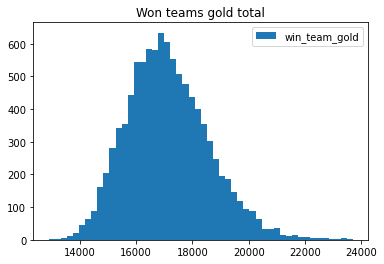

<Figure size 432x288 with 0 Axes>

In [12]:
plt.hist(win_team_total_gold, histtype='bar', label=['win_team_gold'], bins=50)
plt.title('Won teams gold total')
plt.legend()
plt.figure()

In [13]:
# 블루 팀이 졌을 때의 블루 팀 골드 총합 + 블루 팀이 이겼을 때의 레드 팀 골드 총합 = (전체) 패배 팀 골드 총합
lose_team_total_gold = pd.concat([blue_lose_count['blueTotalGold'], blue_win_count['redTotalGold']], ignore_index=True)

<Figure size 432x288 with 0 Axes>

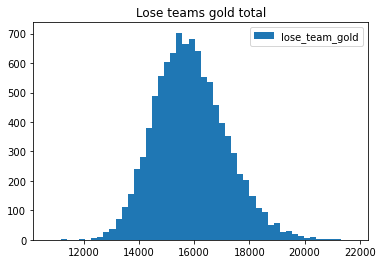

<Figure size 432x288 with 0 Axes>

In [14]:
plt.hist(lose_team_total_gold, histtype='bar', label=['lose_team_gold'], bins=50)
plt.title('Lose teams gold total')
plt.legend()
plt.figure()

**아래의 내용은 프로젝트에 해당되지 않을 수도 있으나 확실하지 않기도 하고 직관적인 비교를 위해 추가하였음**

<Figure size 432x288 with 0 Axes>

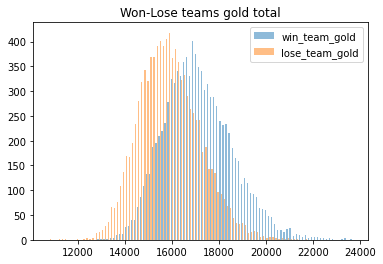

<Figure size 432x288 with 0 Axes>

In [15]:
plt.hist((win_team_total_gold, lose_team_total_gold), label=['win_team_gold', 'lose_team_gold'], bins=100, alpha=0.5)
plt.title('Won-Lose teams gold total')
plt.legend()
plt.figure()

### 4) 상대편보다 킬 수가 많은 것, 상대편보다 얻은 경험치의 총량이 많은 것, 상대편보다 얻은 골드가 많은 것, 상대편보다 평균 레벨이 높은 것, 중에서 게임의 승리에 있어서 가장 중요하다고 생각하는 것은 무엇인지 나름대로 분석해 보고 결론을 내려보세요.


킬 수, 경험치의 총량, 골드, 평균 레벨 중 중요한 것

In [16]:
corr_matrix = df.corr()
corr_matrix = corr_matrix.drop("blueWins")
corr_matrix["blueWins"].sort_values(ascending=False)

blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
gameId                          0.000985
blueWardsPlaced                 0.000087
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redHeralds                     -0.097172
redTowersDestroyed             -0.103696
redTotalJungleMi